In [91]:
import pandas as pd
from datetime import datetime
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib



In [4]:
# Functions for conversion of the date string to a datetime object. 
# This will be applied to a series in the pandas dataframe 
def conv_date(strobj):
    try:
        # The strptime function will take two arguments. The first argument
        # will be the string object passed from the series (as this function is used via "apply" method).
        # The second object is the formatting statement. See here for more details:
        # https://www.programiz.com/python-programming/datetime/strptime        
        return datetime.strptime(strobj,'%m/%d/%Y %I:%M:%S %p')
    except:
        return np.nan

In [5]:
df_311 = pd.read_csv("311_Service_Requests_from_2015_to_Present_head_1000.csv")
df_311['Created Date'].head()

0    01/01/2015 12:00:50 AM
1    01/01/2015 12:01:29 AM
2    01/01/2015 12:01:30 AM
3    01/01/2015 12:04:28 AM
4    01/01/2015 12:04:44 AM
Name: Created Date, dtype: object

In [6]:
df_311['Created Date'] = df_311['Created Date'].apply(conv_date)
df_311['Closed Date']  = df_311['Closed Date'].apply(conv_date)
df_311['Created Date'].head()

0   2015-01-01 00:00:50
1   2015-01-01 00:01:29
2   2015-01-01 00:01:30
3   2015-01-01 00:04:28
4   2015-01-01 00:04:44
Name: Created Date, dtype: datetime64[ns]

In [7]:
df_311.count()

Unique Key                        999
Created Date                      999
Closed Date                       992
Agency                            999
Agency Name                       999
Complaint Type                    999
Descriptor                        997
Location Type                     899
Incident Zip                      983
Incident Address                  911
Street Name                       911
Cross Street 1                    906
Cross Street 2                    905
Intersection Street 1              85
Intersection Street 2              85
Address Type                      990
City                              983
Landmark                            0
Facility Type                     876
Status                            999
Due Date                          925
Resolution Description            999
Resolution Action Updated Date    992
Community Board                   999
BBL                               864
Borough                           999
X Coordinate

<BarContainer object of 41 artists>

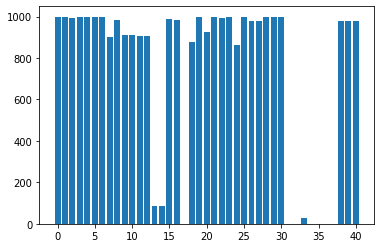

In [8]:
xcoord = range(0,len(df_311.count().values))
yheight = df_311.count().values
plt.bar(x=xcoord,height=yheight)

In [11]:
list_to_drop = []
for ind,val in zip(list(df_311.count().index),df_311.count().values):
    if val<600:
        print(ind,val)
        list_to_drop.append(ind)

Intersection Street 1 85
Intersection Street 2 85
Landmark 0
Vehicle Type 0
Taxi Company Borough 0
Taxi Pick Up Location 30
Bridge Highway Name 0
Bridge Highway Direction 0
Road Ramp 0
Bridge Highway Segment 0


In [12]:
df_311 = pd.read_csv("311_Service_Requests_from_2015_to_Present_head_1000.csv")
df_311['Created Date'] = df_311['Created Date'].apply(conv_date)
df_311['Closed Date']  = df_311['Closed Date'].apply(conv_date)

df_311.drop(columns=list_to_drop, inplace=True)

#df_311.drop(columns=['Landmark','Intersection Street 1','Intersection Street 2',
#                     'Bridge Highway Segment','Road Ramp','Bridge Highway Direction',
#                    'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',
#                     'Latitude','Longitude','Location','BBL','Resolution Description','Facility Type','Due Date',
#                    'Descriptor','Resolution Action Updated Date','Cross Street 1','Cross Street 2','Address Type','Unique Key'], inplace=True)

df_311.count()


Unique Key                        999
Created Date                      999
Closed Date                       992
Agency                            999
Agency Name                       999
Complaint Type                    999
Descriptor                        997
Location Type                     899
Incident Zip                      983
Incident Address                  911
Street Name                       911
Cross Street 1                    906
Cross Street 2                    905
Address Type                      990
City                              983
Facility Type                     876
Status                            999
Due Date                          925
Resolution Description            999
Resolution Action Updated Date    992
Community Board                   999
BBL                               864
Borough                           999
X Coordinate (State Plane)        980
Y Coordinate (State Plane)        980
Open Data Channel Type            999
Park Facilit

In [14]:
# Checking uniqueness of each column
list_of_columns=list(df_311.count().index)

In [17]:
for col in list_of_columns:
    print(col,'              ',len(df_311[col].unique()))

Unique Key                999
Created Date                963
Closed Date                880
Agency                13
Agency Name                16
Complaint Type                40
Descriptor                67
Location Type                15
Incident Zip                152
Incident Address                685
Street Name                526
Cross Street 1                481
Cross Street 2                480
Address Type                5
City                44
Facility Type                3
Status                4
Due Date                910
Resolution Description                55
Resolution Action Updated Date                878
Community Board                64
BBL                631
Borough                6
X Coordinate (State Plane)                738
Y Coordinate (State Plane)                745
Open Data Channel Type                5
Park Facility Name                3
Park Borough                6
Latitude                746
Longitude                746
Location                746

In [125]:
df_311 = pd.read_csv("311_Service_Requests_from_2015_to_Present_head_1000.csv")
df_311['Created Date'] = df_311['Created Date'].apply(conv_date)
df_311['Closed Date']  = df_311['Closed Date'].apply(conv_date)

df_311.drop(columns=['Landmark','Intersection Street 1','Intersection Street 2',
                     'Bridge Highway Segment','Road Ramp','Bridge Highway Direction',
                    'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',
                     'Latitude','Longitude','Location','BBL','Resolution Description','Facility Type','Due Date',
                    'Descriptor','Resolution Action Updated Date','Cross Street 1','Cross Street 2','Address Type','Unique Key'], inplace=True)


In [126]:
df_311_cleaned = df_311.dropna()
df_311_cleaned.count()

Created Date                  844
Closed Date                   844
Agency                        844
Agency Name                   844
Complaint Type                844
Location Type                 844
Incident Zip                  844
Incident Address              844
Street Name                   844
City                          844
Status                        844
Community Board               844
Borough                       844
X Coordinate (State Plane)    844
Y Coordinate (State Plane)    844
Open Data Channel Type        844
Park Facility Name            844
Park Borough                  844
dtype: int64

In [127]:
df_311_cleaned['Time to Closed'] = df_311_cleaned['Closed Date'] - df_311_cleaned['Created Date']

/Users/pgarias/python_virtual_envs/python3_emr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_311_cleaned[df_311_cleaned['Time to Closed']>dt.timedelta(minutes=30)].head()


,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Time to Closed
0,2015-01-01 00:00:50,2015-01-01 02:47:50,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,11420.0,123-19 135 STREET,135 STREET,SOUTH OZONE PARK,Closed,10 QUEENS,QUEENS,1038733.0,184971.0,PHONE,Unspecified,QUEENS,02:47:00
1,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONX,Closed,12 BRONX,BRONX,1024816.0,262237.0,PHONE,Unspecified,BRONX,02:40:53
3,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BRONX,Closed,07 BRONX,BRONX,1009923.0,255465.0,ONLINE,Unspecified,BRONX,02:20:34
4,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Street/Sidewalk,11421.0,84-25 85 ROAD,85 ROAD,WOODHAVEN,Closed,09 QUEENS,QUEENS,1022809.0,192567.0,PHONE,Unspecified,QUEENS,10:17:47
5,2015-01-01 00:04:51,2015-01-01 01:03:07,NYPD,New York City Police Department,Noise - Residential,Residential Building/House,11375.0,89-04 70 ROAD,70 ROAD,FOREST HILLS,Closed,06 QUEENS,QUEENS,1024948.0,197703.0,PHONE,Unspecified,QUEENS,00:58:16


In [129]:
drop_index = df_311_cleaned[((df_311_cleaned['Complaint Type']=='Noise - Street/Sidewalk') | 
               (df_311_cleaned['Complaint Type']=='Noise - Vehicle') | 
               (df_311_cleaned['Complaint Type']=='Noise - Residential') | 
               (df_311_cleaned['Complaint Type']=='Noise - Commercial') | 
               (df_311_cleaned['Complaint Type']=='Noise - Helicopter') |
               (df_311_cleaned['Complaint Type']=='Noise')) & (df_311_cleaned['Time to Closed']>dt.timedelta(minutes=931.55)) ].index

In [130]:
df_311_cleaned = df_311_cleaned.drop(index=drop_index)

838

In [108]:
for item in df_311['Complaint Type'].unique():
    if 'Noise' in item:
        print(item)

Noise - Street/Sidewalk
Noise - Vehicle
Noise - Residential
Noise - Commercial
Noise - Helicopter
Noise


In [48]:
#df_311_cleaned['Time to Closed'].idxmax()

934

In [49]:
#df_311_cleaned['Time to Closed'].max()

Timedelta('61 days 00:04:09')

In [88]:
import datetime as dt

In [89]:
dt.timedelta(minutes=30)

datetime.timedelta(0, 1800)

In [50]:
df_311_cleaned.reset_index(drop=True)['Time to Closed'].idxmax()

809

In [68]:
df_311_cleaned['Complaint Type'].unique()

array(['Blocked Driveway', 'Noise - Street/Sidewalk', 'Noise - Vehicle',
       'Illegal Parking', 'Noise - Residential', 'Derelict Vehicles',
       'Noise - Commercial', 'Noise - Helicopter', 'Taxi Complaint',
       'Street Condition', 'Food Poisoning', 'Derelict Vehicle',
       'Food Establishment', 'Animal Abuse', 'Drinking',
       'Dirty Conditions'], dtype=object)